In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [233]:
df=pd.read_csv(r"C:\prac\kidney_disease.csv")

In [234]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [235]:
columns=pd.read_csv("C:\prac\data_description.txt",sep='-')
columns=columns.reset_index()
columns.columns=['cols','abb_col_names']

In [236]:
df.columns=columns['abb_col_names'].values

In [237]:
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [238]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [239]:
features=['red blood cell count','packed cell volume','white blood cell count']

In [240]:
def convert_dtype(df,feature):
    df[feature]=pd.to_numeric(df[feature], errors='coerce')

In [241]:
for feature in features:
    convert_dtype(df,feature)

In [242]:
df.drop('id',axis=1,inplace=True)

In [243]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [244]:
cat_col,num_col=extract_cat_num(df)

In [245]:
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary artery disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




In [246]:
df['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['coronary artery disease'].replace(to_replace={'\tno':'no'},inplace=True)


In [247]:
df['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

In [248]:
for col in cat_col:
    print('{} has {} values'.format(col, df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values


pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' nan] values


coronary artery disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




In [249]:
len(num_col)

14

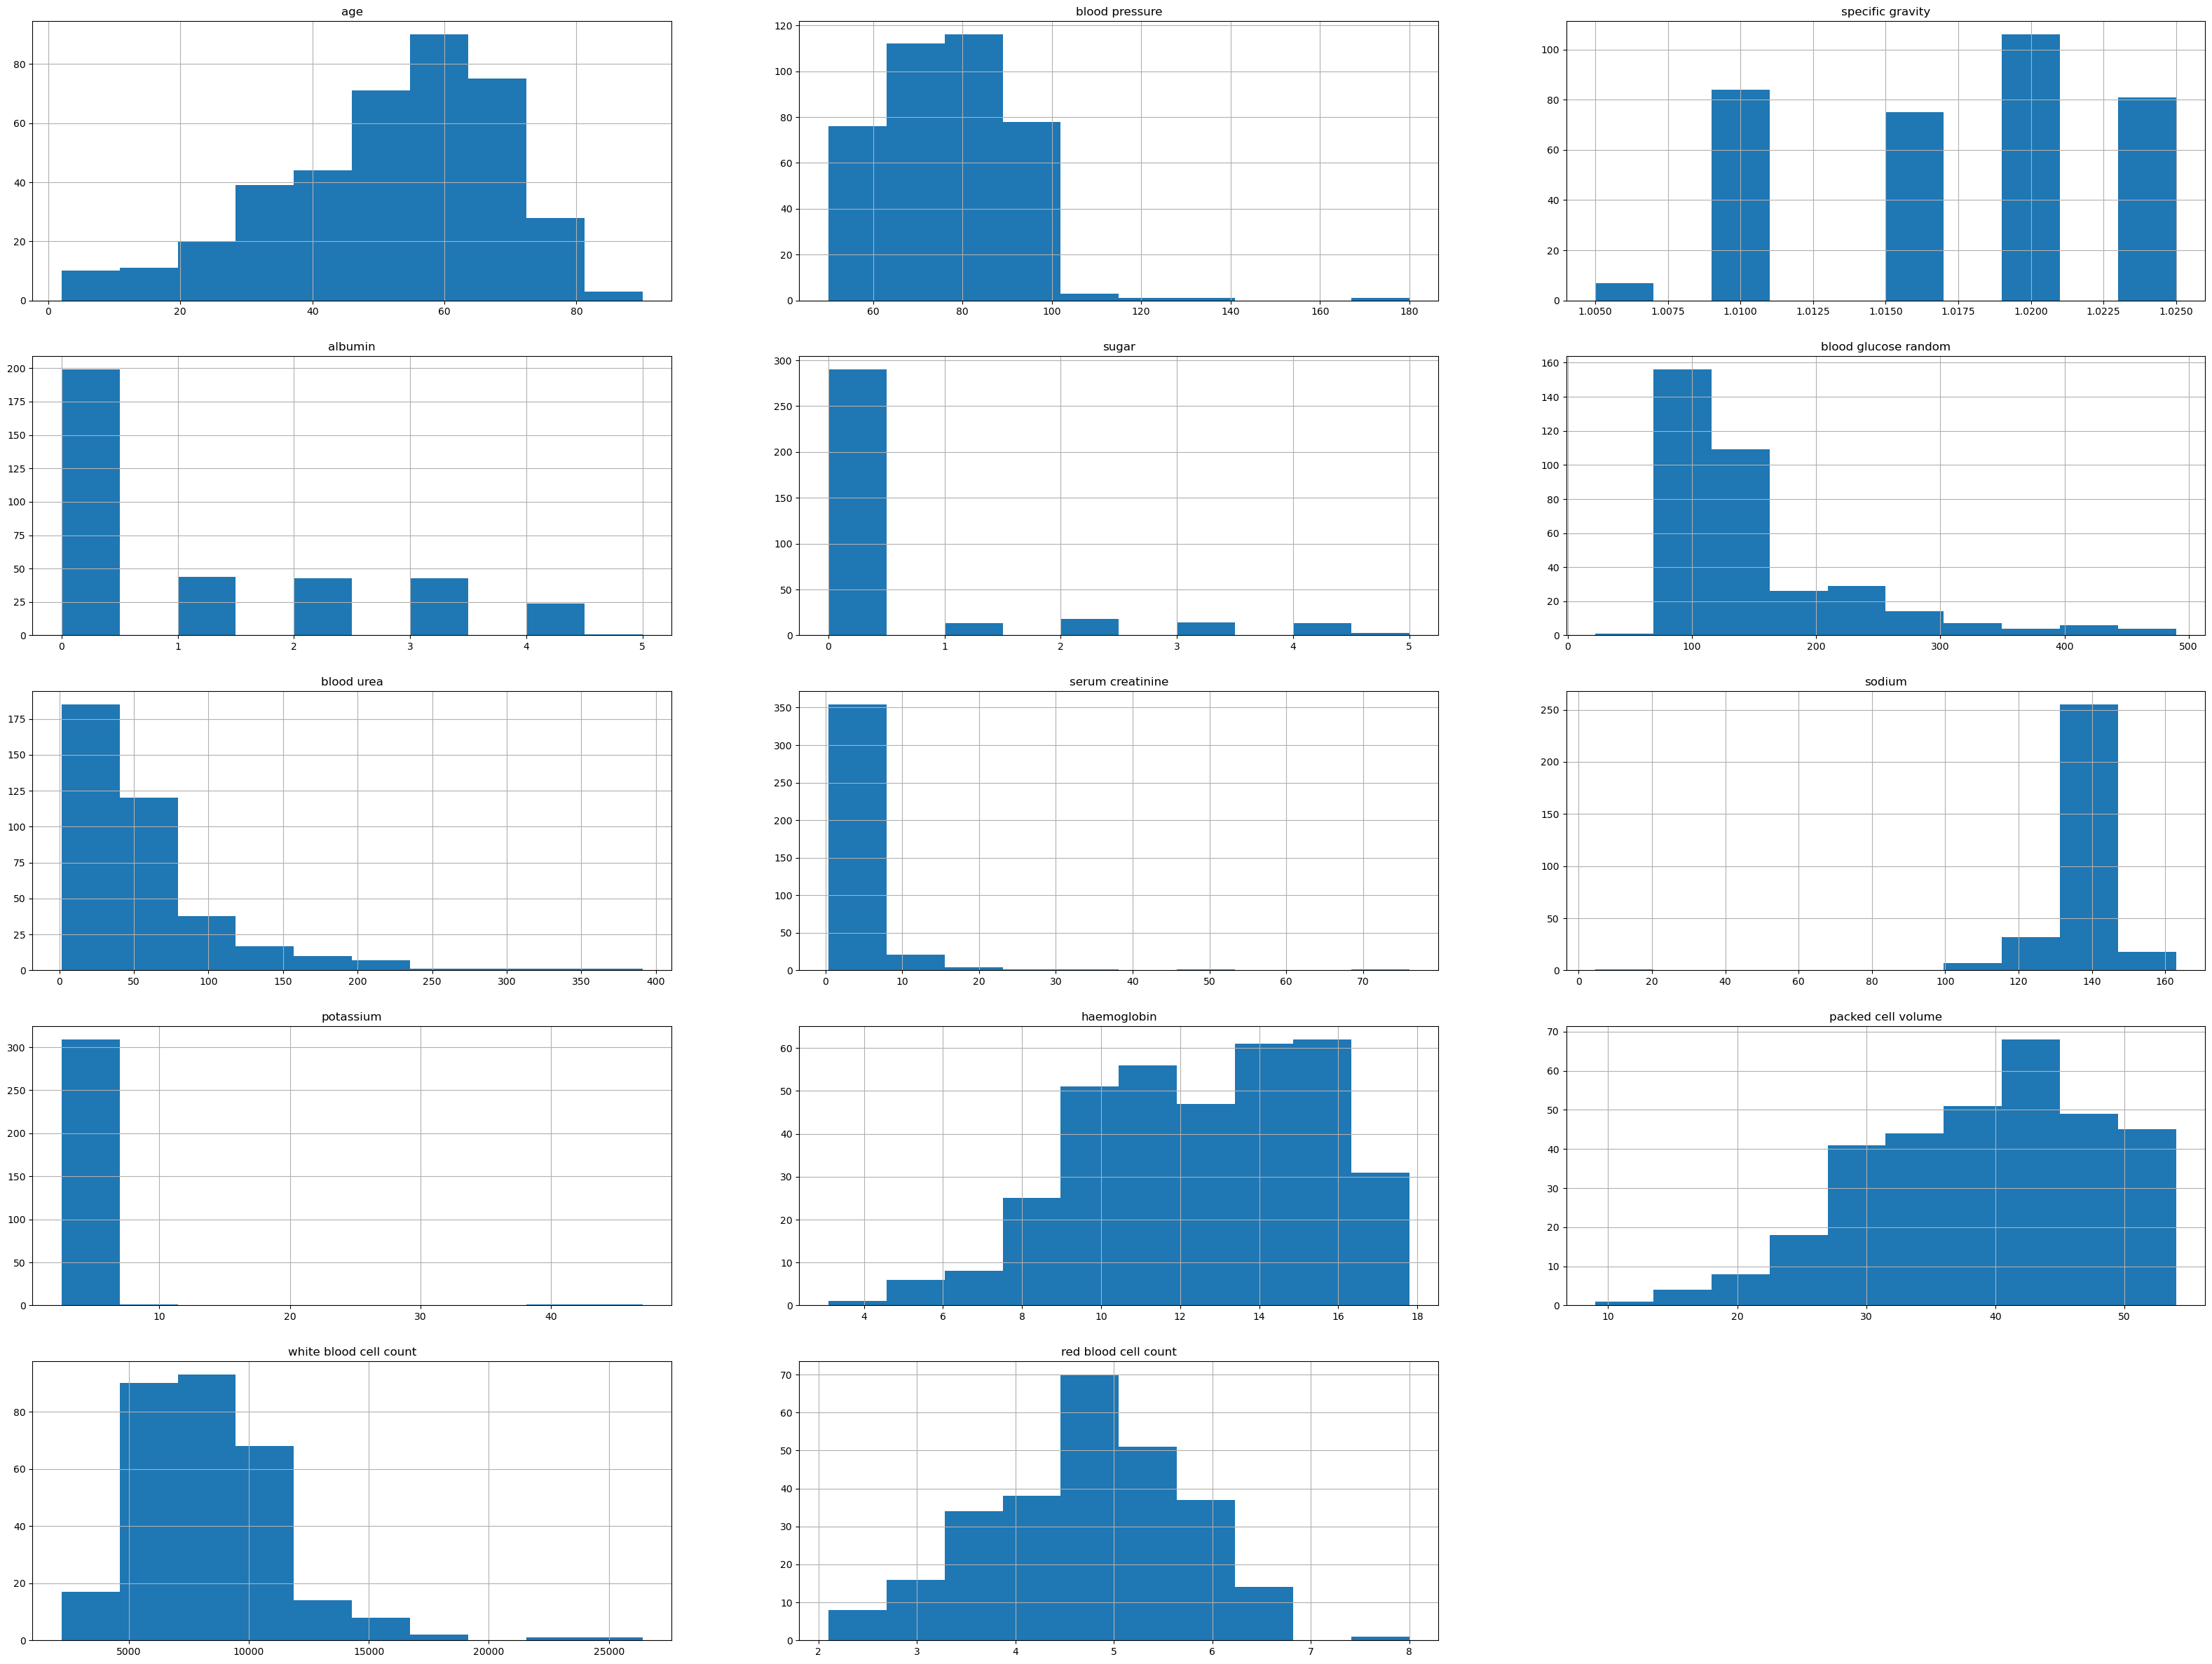

In [250]:
plt.figure(figsize=(40,30))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

In [251]:
len(cat_col)

11

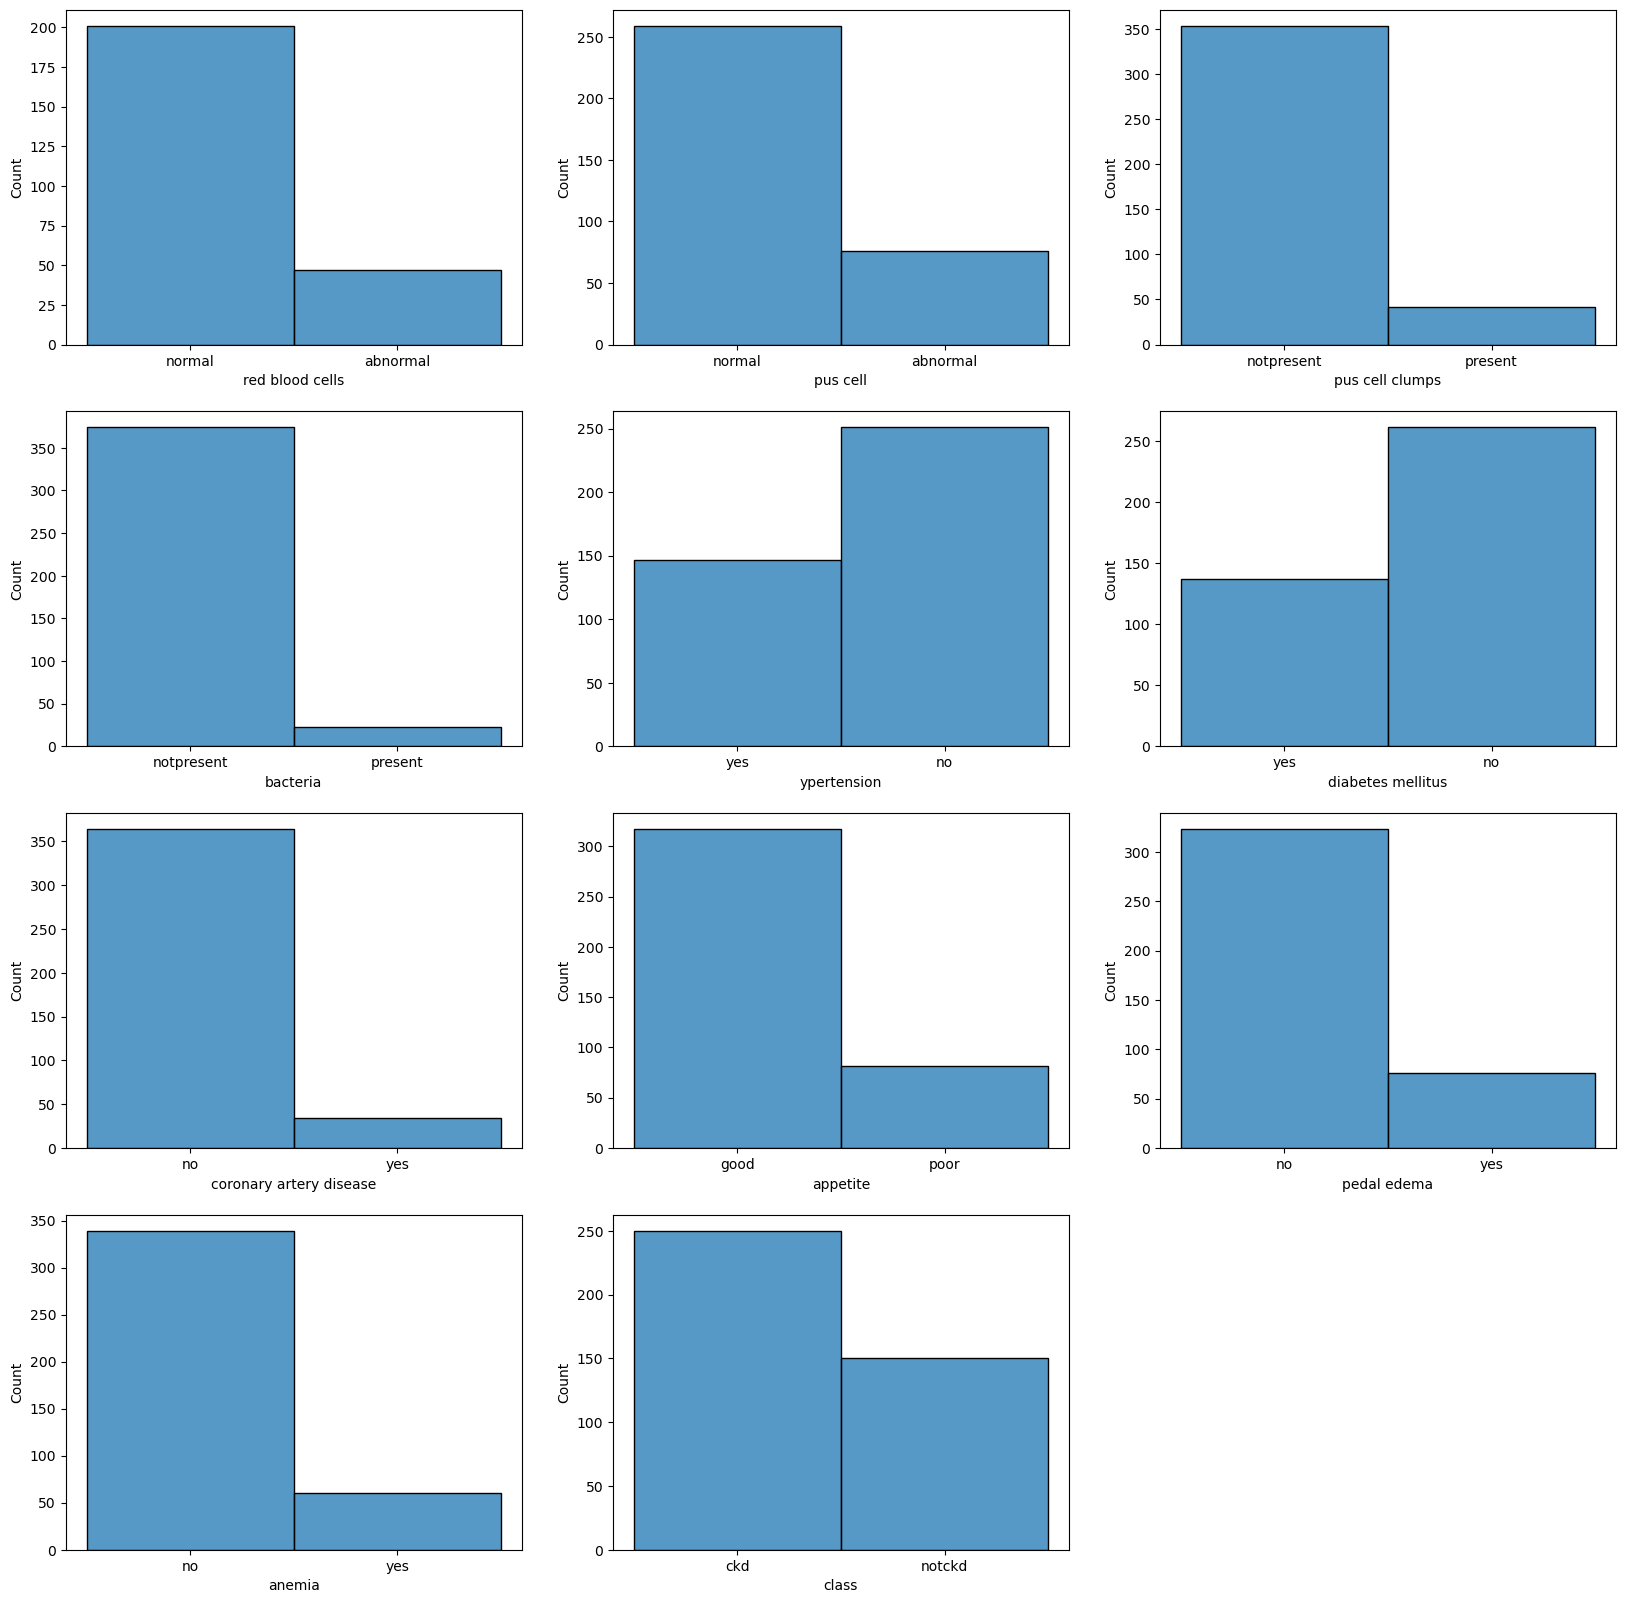

In [252]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.histplot(df[feature])

<Axes: xlabel='class', ylabel='Count'>

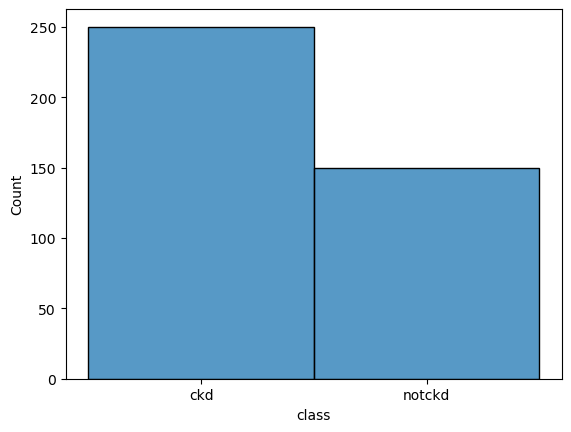

In [253]:
sns.histplot(df['class'])

<Axes: >

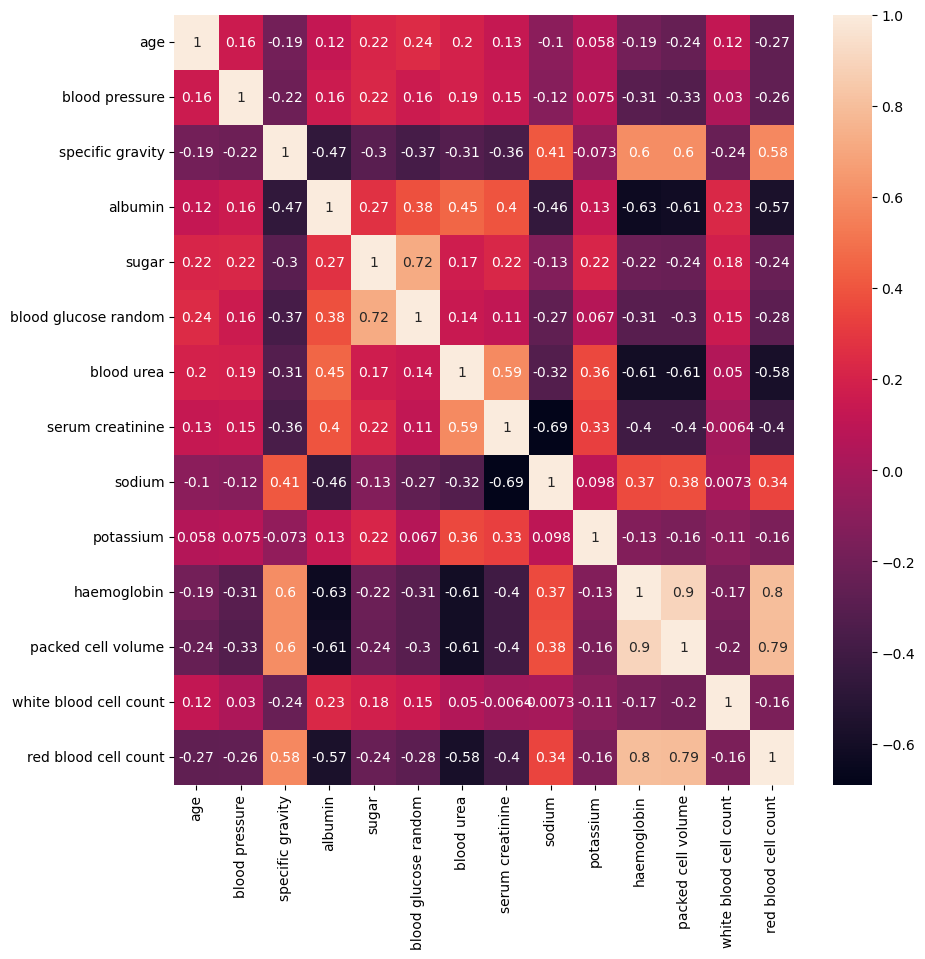

In [254]:
plt.figure(figsize=(10,10))
df.corr()
sns.heatmap(df.corr(),annot=True)

In [255]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [256]:
import plotly.express as px

In [257]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [258]:
px.violin(df,y='red blood cell count',x="class", color="class")

In [259]:
px.scatter(df,'haemoglobin','packed cell volume')

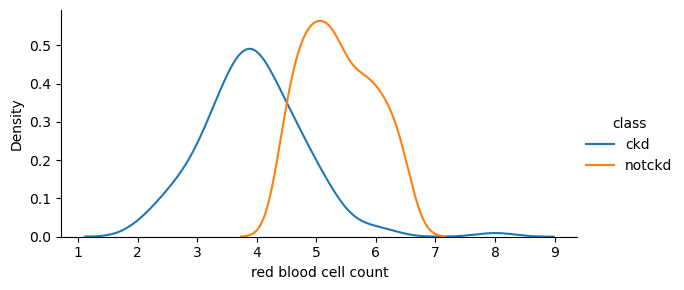

In [260]:
grid=sns.FacetGrid(df, hue="class",aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

In [261]:
def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(df, x=col1, y=col2, color="class")
    return fig.show()

In [262]:
def kde_plot(feature):
    grid = sns.FacetGrid(df, hue="class",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

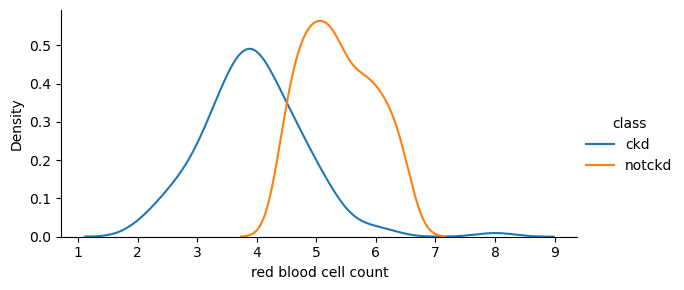

In [263]:
kde_plot('red blood cell count')

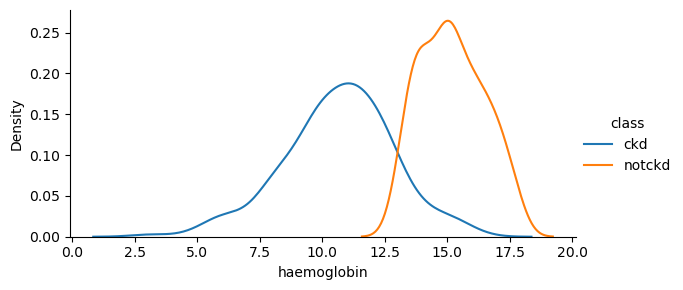

In [264]:
kde_plot('haemoglobin')

In [265]:
scatters('red blood cell count', 'packed cell volume')

In [266]:
scatters('red blood cell count', 'haemoglobin')

In [267]:
scatters('haemoglobin','packed cell volume')

In [268]:
violin('red blood cell count')

In [269]:
violin('packed cell volume')

In [270]:
scatters('red blood cell count','albumin')

In [271]:
scatters('packed cell volume','blood urea')

In [272]:
fig = px.bar(df, x="specific gravity", y="packed cell volume",
             color='class', barmode='group',
             height=400)
fig.show()

In [273]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [274]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
pus cell                    65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [275]:
cat_col

['red blood cells',
 'pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [276]:
data=df.copy()

In [277]:
data['red blood cells'].isnull().sum()

152

In [278]:
data['red blood cells'].dropna().sample()

300    normal
Name: red blood cells, dtype: object

In [293]:
random_sample=data['red blood cells'].dropna().sample(data['red blood cells'].isnull().sum())
random_sample

395      normal
305      normal
278      normal
321      normal
43     abnormal
         ...   
189    abnormal
293      normal
324      normal
233      normal
266      normal
Name: red blood cells, Length: 152, dtype: object

In [294]:
random_sample.index

Int64Index([395, 305, 278, 321,  43, 303, 248, 272, 258, 325,
            ...
            158, 368, 331, 289,   9, 189, 293, 324, 233, 266],
           dtype='int64', length=152)

In [295]:
data[data['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [296]:
random_sample.index=data[data['red blood cells'].isnull()].index

In [297]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [298]:
random_sample

0        normal
1        normal
5        normal
6        normal
10     abnormal
         ...   
309    abnormal
322      normal
349      normal
350      normal
381      normal
Name: red blood cells, Length: 152, dtype: object

In [299]:
data.loc[data['red blood cells'].isnull(),'red blood cells']=random_sample

In [300]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


<Axes: xlabel='red blood cells', ylabel='Count'>

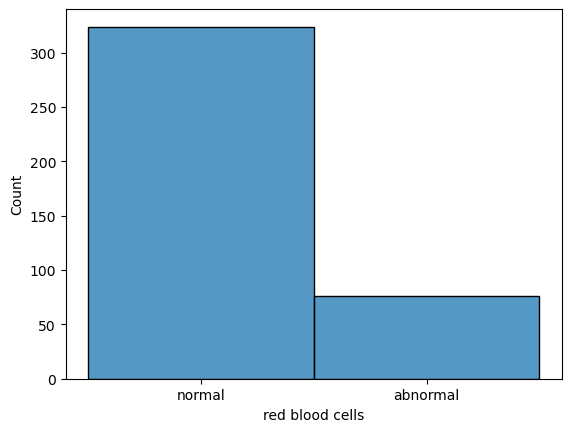

In [301]:
sns.histplot(data['red blood cells'])

In [302]:
data['red blood cells'].value_counts()/len(data)

normal      0.81
abnormal    0.19
Name: red blood cells, dtype: float64

In [303]:
len(df[df['red blood cells']=='normal'])/248

0.8104838709677419

In [304]:
len(df[df['red blood cells']=='abnormal'])/248

0.18951612903225806

In [305]:
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [306]:
Random_value_imputation('pus cell')
Random_value_imputation('red blood cells')

In [307]:
data[cat_col].isnull().sum()

red blood cells            0
pus cell                   0
pus cell clumps            4
bacteria                   4
ypertension                2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anemia                     1
class                      0
dtype: int64

In [308]:
mode=data['pus cell clumps'].mode()[0]
mode

'notpresent'

In [309]:
data['pus cell clumps']=data['pus cell clumps'].fillna(mode)

In [310]:
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [311]:
for col in cat_col:
    impute_mode(col)

In [312]:
data[cat_col].isnull().sum()

red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [313]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [314]:
for col in num_col:
    Random_value_imputation(col)

In [315]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [316]:
for col in cat_col:
    print('{} has {} categories'.format(col, data[col].nunique()))

red blood cells has 2 categories
pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 2 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [317]:
from sklearn.preprocessing import LabelEncoder

In [318]:
le = LabelEncoder()

In [319]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [320]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,140.0,...,38.0,6000.0,4.0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.4,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [321]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [322]:
ind_col=[col for col in data.columns if col!='class']
dep_col='class'

In [323]:
X=data[ind_col]
y=data[dep_col]

In [324]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [325]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x000001F3A0813400>)

In [326]:
ordered_feature.scores_

array([1.07302790e+02, 8.63013699e+01, 5.51023751e-03, 2.46558025e+02,
       7.88336842e+01, 9.24773663e+00, 1.35050375e+01, 2.52000000e+01,
       1.32000000e+01, 2.72330028e+03, 2.34426464e+03, 2.38154471e+02,
       2.91744195e+01, 2.47442475e+00, 1.34551287e+02, 3.33197639e+02,
       1.43092393e+04, 2.32902852e+01, 8.82000000e+01, 8.22000000e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [327]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

,Score
0,107.302790
1,86.301370
2,0.005510
3,246.558025
4,78.833684
5,9.247737
6,13.505038
7,25.200000
8,13.200000
9,2723.300285


In [328]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [329]:
features_rank=pd.concat([dfcolumns,datascores],axis=1)
features_rank

,0,Score
0,age,107.302790
1,blood pressure,86.301370
2,specific gravity,0.005510
3,albumin,246.558025
4,sugar,78.833684
5,red blood cells,9.247737
6,pus cell,13.505038
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2723.300285


In [339]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,age,107.302790
1,blood pressure,86.301370
2,specific gravity,0.005510
3,albumin,246.558025
4,sugar,78.833684
5,red blood cells,9.247737
6,pus cell,13.505038
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2723.300285


In [340]:
features_rank.nlargest(10,'Score')

,Features,Score
16,white blood cell count,14309.239325
9,blood glucose random,2723.300285
10,blood urea,2344.264637
15,packed cell volume,333.197639
3,albumin,246.558025
11,serum creatinine,238.154471
14,haemoglobin,134.551287
0,age,107.302790
18,ypertension,88.200000
1,blood pressure,86.301370


In [341]:
selected_columns=features_rank.nlargest(10,'Score')['Features'].values

In [360]:
X_new=data[selected_columns]
X_new

,white blood cell count,blood glucose random,blood urea,packed cell volume,albumin,serum creatinine,haemoglobin,age,ypertension,blood pressure
0,7800.0,121.0,36.0,44.0,1.0,1.2,15.4,48.0,1,80.0
1,6000.0,140.0,18.0,38.0,4.0,0.8,11.3,7.0,0,50.0
2,7500.0,423.0,53.0,31.0,2.0,1.8,9.6,62.0,0,80.0
3,6700.0,117.0,56.0,32.0,4.0,3.8,11.2,48.0,1,70.0
4,7300.0,106.0,26.0,35.0,2.0,1.4,11.6,51.0,0,80.0
...,...,...,...,...,...,...,...,...,...,...
395,6700.0,140.0,49.0,47.0,0.0,0.5,15.7,55.0,0,80.0
396,7800.0,75.0,31.0,54.0,0.0,1.2,16.5,42.0,0,70.0
397,6600.0,100.0,26.0,49.0,0.0,0.6,15.8,12.0,0,80.0
398,7200.0,114.0,50.0,51.0,0.0,1.0,14.2,17.0,0,60.0


In [343]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size=0.75)

In [344]:
print(X_train.shape)
print(X_test.shape)

(300, 10)
(100, 10)


In [345]:
y_train.value_counts()

0    182
1    118
Name: class, dtype: int64

In [346]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [361]:
params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [348]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [364]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [362]:
from sklearn.model_selection import RandomizedSearchCV

In [365]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [353]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [363]:
classifier=XGBClassifier()

In [355]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [224]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [381]:
classifier=random_search.best_estimator_
classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [380]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [382]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [383]:
y_pred=classifier.predict(X_test)

In [384]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [385]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[65  3]
 [ 0 32]]


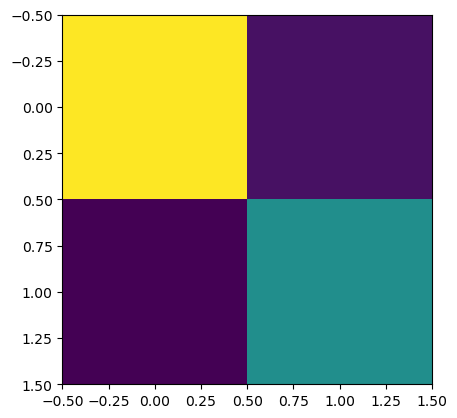

In [386]:
plt.imshow(confusion)

In [387]:
accuracy_score(y_test, y_pred)

0.97